# MAI391 FINAL PROJECT
# ROCK-PAPER-SCISSORS Image Classification

In [4]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras


In [17]:
from keras import layers
from keras.layers import Dense

In [5]:
# tfds.list_builders()
# ROCK, PAPER, SCISSORS dataset information
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

# DATA PREP

In [6]:
ds_train = tfds.load(name='rock_paper_scissors', split = 'train')
ds_test = tfds.load(name='rock_paper_scissors', split = 'test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteNT0YCL/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteNT0YCL/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [7]:
# convert into np array
# since we mostly work with contour and edges --> only need 1 color channel

train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [8]:
type(train_images[0])
type(test_images[0])

numpy.ndarray

In [9]:
print(train_images.shape)
print(test_images.shape)
# 2520 images of 300x300 pixel

(2520, 300, 300)
(372, 300, 300)


In [10]:
# fig = tfds.show_examples(info, ds_train)

In [11]:
# reshape, add a another column for color channel

train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)

In [12]:
train_images.dtype
# 8 bit --> values from 0-255 to prepresent color

dtype('uint8')

In [13]:
# convert to float values between 0-1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [14]:
print(train_images.shape)
print(test_images.shape)

(2520, 300, 300, 1)
(372, 300, 300, 1)


# MODEL BUILDING

# USING Fully-Connected ANN

In [77]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

In [78]:
model.compile(
    optimizer='adam',          
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [79]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 24s 292ms/step - loss: 24.0071 - accuracy: 0.4437
Epoch 2/5
79/79 [==============================] - 23s 288ms/step - loss: 1.5749 - accuracy: 0.6893
Epoch 3/5
79/79 [==============================] - 23s 288ms/step - loss: 0.9303 - accuracy: 0.7476
Epoch 4/5
79/79 [==============================] - 23s 287ms/step - loss: 0.7201 - accuracy: 0.7591
Epoch 5/5
79/79 [==============================] - 23s 287ms/step - loss: 0.4426 - accuracy: 0.8627


In [80]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 90ms/step - loss: 3.6008 - accuracy: 0.4274


[3.6007542610168457, 0.42741936445236206]

#  USING CNN

In [18]:
model_cnn = keras.Sequential([
  layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), activation='relu', input_shape=(300,300,1)),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
])

In [19]:
model_cnn.compile(
    optimizer='adam',          
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [20]:
model_cnn.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 40s 368ms/step - loss: 4.7050 - accuracy: 0.8028
Epoch 2/5
79/79 [==============================] - 27s 340ms/step - loss: 0.0692 - accuracy: 0.9893
Epoch 3/5
79/79 [==============================] - 27s 340ms/step - loss: 0.0269 - accuracy: 0.9968
Epoch 4/5
79/79 [==============================] - 27s 340ms/step - loss: 0.0053 - accuracy: 0.9996
Epoch 5/5
79/79 [==============================] - 27s 342ms/step - loss: 0.0018 - accuracy: 1.0000


In [21]:
model_cnn.evaluate(test_images, test_labels)

12/12 [==============================] - 3s 250ms/step - loss: 1.7865 - accuracy: 0.5860


[1.786546230316162, 0.5860214829444885]

# CNN model, ver 2

In [31]:
model_cnn2 = keras.Sequential([
  layers.AveragePooling2D(pool_size=4,strides=2, input_shape=(300,300,1)),                           
  layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), activation='relu'),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
])

In [32]:
model_cnn2.compile(
    optimizer='adam',          
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [33]:
model_cnn2.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 10s 105ms/step - loss: 2.4399 - accuracy: 0.4774
Epoch 2/5
79/79 [==============================] - 7s 94ms/step - loss: 0.4580 - accuracy: 0.8397
Epoch 3/5
79/79 [==============================] - 8s 96ms/step - loss: 0.1222 - accuracy: 0.9794
Epoch 4/5
79/79 [==============================] - 7s 95ms/step - loss: 0.0486 - accuracy: 0.9937
Epoch 5/5
79/79 [==============================] - 7s 95ms/step - loss: 0.0247 - accuracy: 0.9952


In [34]:
model_cnn2.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 85ms/step - loss: 1.3687 - accuracy: 0.6478


[1.3687196969985962, 0.647849440574646]

## CNN ver 3

In [35]:
from keras.layers.pooling import MaxPool2D
model_cnn3 = keras.Sequential([
  layers.AveragePooling2D(pool_size=4,strides=2, input_shape=(300,300,1)),                           
  layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), activation='relu'),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  layers.MaxPool2D(pool_size=2, strides=2),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
])

In [36]:
model_cnn3.compile(
    optimizer='adam',          
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])
model_cnn3.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 8s 91ms/step - loss: 0.7861 - accuracy: 0.6853
Epoch 2/5
79/79 [==============================] - 7s 91ms/step - loss: 0.0781 - accuracy: 0.9841
Epoch 3/5
79/79 [==============================] - 7s 91ms/step - loss: 0.0152 - accuracy: 0.9988
Epoch 4/5
79/79 [==============================] - 7s 91ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5/5
79/79 [==============================] - 7s 91ms/step - loss: 0.0027 - accuracy: 1.0000


In [37]:
model_cnn3.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 47ms/step - loss: 0.9024 - accuracy: 0.7016


[0.9023868441581726, 0.7016128897666931]

# CNN ver 4
adding Dropouts

In [42]:
from keras.layers.pooling import MaxPool2D
model_cnn4 = keras.Sequential([
  layers.AveragePooling2D(pool_size=4,strides=2, input_shape=(300,300,1)),                           
  layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), activation='relu'),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
  layers.MaxPool2D(pool_size=2, strides=2),
  layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
])

In [45]:
model_cnn4.compile(
    optimizer='adam',          
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])
model_cnn4.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
79/79 [==============================] - 10s 116ms/step - loss: 0.0152 - accuracy: 0.9964
Epoch 2/10
79/79 [==============================] - 9s 117ms/step - loss: 0.0039 - accuracy: 0.9992
Epoch 3/10
79/79 [==============================] - 9s 117ms/step - loss: 5.8022e-04 - accuracy: 1.0000
Epoch 4/10
79/79 [==============================] - 9s 116ms/step - loss: 7.4364e-04 - accuracy: 1.0000
Epoch 5/10
79/79 [==============================] - 9s 117ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 6/10
79/79 [==============================] - 9s 116ms/step - loss: 0.3732 - accuracy: 0.8492
Epoch 7/10
79/79 [==============================] - 9s 115ms/step - loss: 0.1637 - accuracy: 0.9563
Epoch 8/10
79/79 [==============================] - 9s 116ms/step - loss: 0.0119 - accuracy: 0.9968
Epoch 9/10
79/79 [==============================] - 9s 116ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 10/10
79/79 [==============================] - 9s 116ms/step - loss: 0.0020 - accurac

In [46]:
model_cnn4.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 59ms/step - loss: 2.8155 - accuracy: 0.5726


[2.815450668334961, 0.5725806355476379]

# fine-tuning parameters with keras tuner

# save, load and plot

In [47]:
model_cnn3.save('/rock_paper_scissors_model')

INFO:tensorflow:Assets written to: /rock_paper_scissors_model/assets


INFO:tensorflow:Assets written to: /rock_paper_scissors_model/assets


In [48]:
loaded_model = keras.models.load_model('/rock_paper_scissors_model')

In [49]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 47ms/step - loss: 1.2244 - accuracy: 0.6882


[1.2243777513504028, 0.6881720423698425]

# Use our model to predict a single example to test

[[4.5018934e-14 5.9107749e-12 1.0000000e+00]]
2


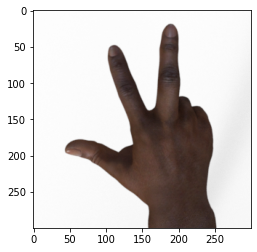

In [67]:
# plot & predit a single image

rgb_images = np.array([example['image'].numpy() for example in ds_train])

rgb_image_pic0 = rgb_images[0]
plt.imshow(rgb_image_pic0)

result = loaded_model.predict(np.array([train_images[0]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

[[5.2156414e-05 9.9992359e-01 2.4256813e-05]]
1


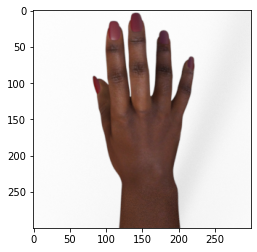

In [70]:
result100 = loaded_model.predict(np.array([train_images[100]]))
print(result100)

predicted_value100 = np.argmax(result100)
print(predicted_value100)

rgb_image_pic100 = rgb_images[100]
plt.imshow(rgb_image_pic100)

[[9.9982554e-01 1.7454935e-04 1.8388188e-09]]
0


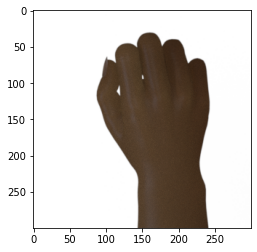

In [71]:
result1000 = loaded_model.predict(np.array([train_images[1000]]))
print(result1000)

predicted_value1000 = np.argmax(result1000)
print(predicted_value1000)

rgb_image_pic1000 = rgb_images[1000]
plt.imshow(rgb_image_pic1000)